# Seaborn: KDEplot

In [88]:
from matplotlib import pyplot as plt
import seaborn as sns

In [89]:
cars = sns.load_dataset('mpg').dropna()

cars.shape

(392, 9)

In [90]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


## Intro Visuals

In [91]:
hp = cars.horsepower

In [92]:
sns.set_style('white')
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

<ipython-input-93-4d9ec8bf0173>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp, rug=True, kde=False, hist=False)


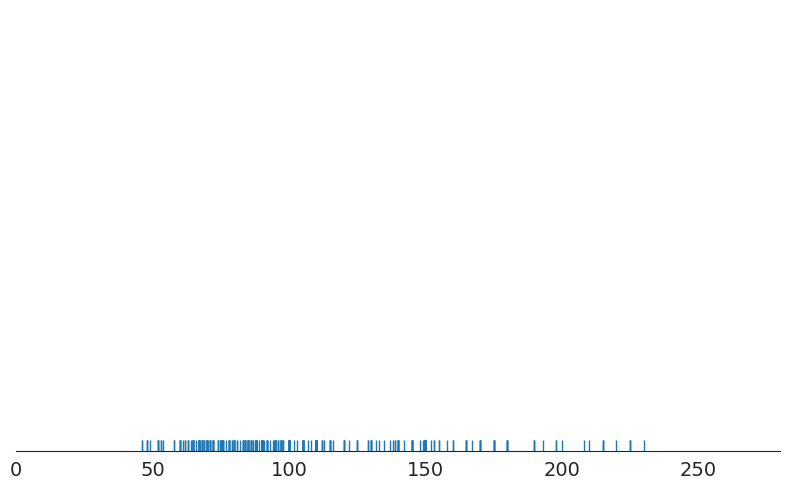

In [93]:
plt.figure(figsize=(8,5))
sns.distplot(hp, rug=True, kde=False, hist=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

<ipython-input-94-4c1cee470380>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp, kde=False)


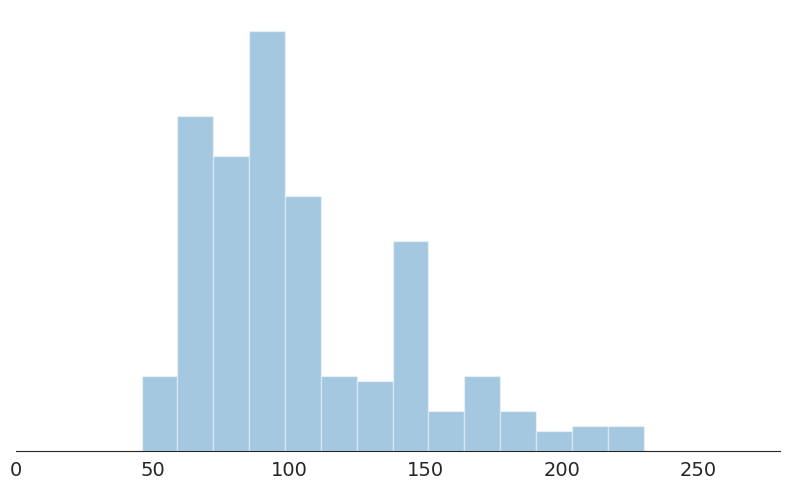

In [94]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde=False)

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

<ipython-input-95-8cbe5e767919>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})


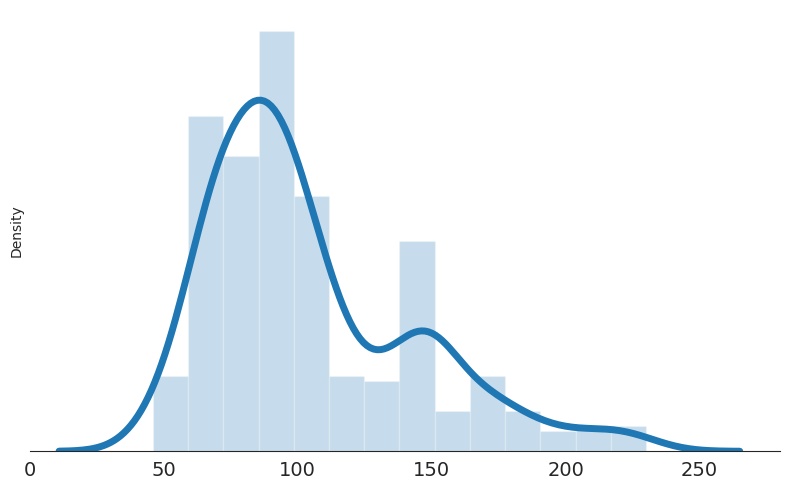

In [95]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

## "How It Works" Visuals

In [96]:
import numpy as np
import scipy.stats as stats

In [97]:
blue, orange, green, red = sns.color_palette()[:4]

In [98]:
pts = [1, 3, 3.5, 4, 6, 8]

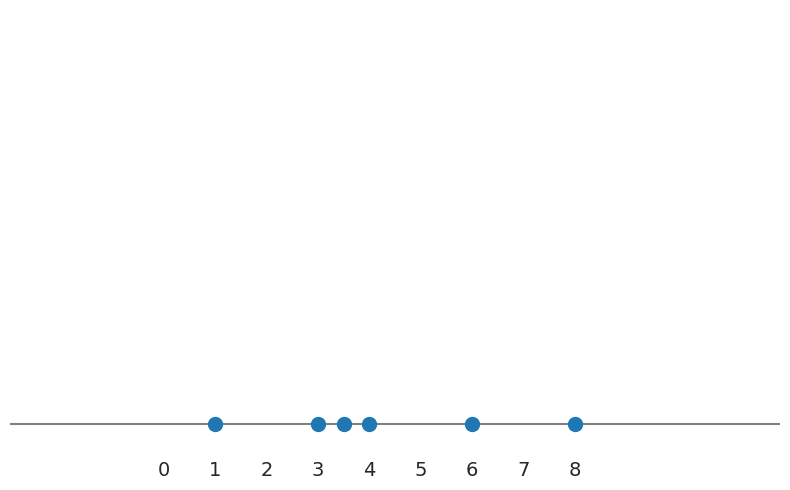

In [99]:
plt.figure(figsize=(8, 5))
plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, 1.5)
plt.xlim(-3, 12)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

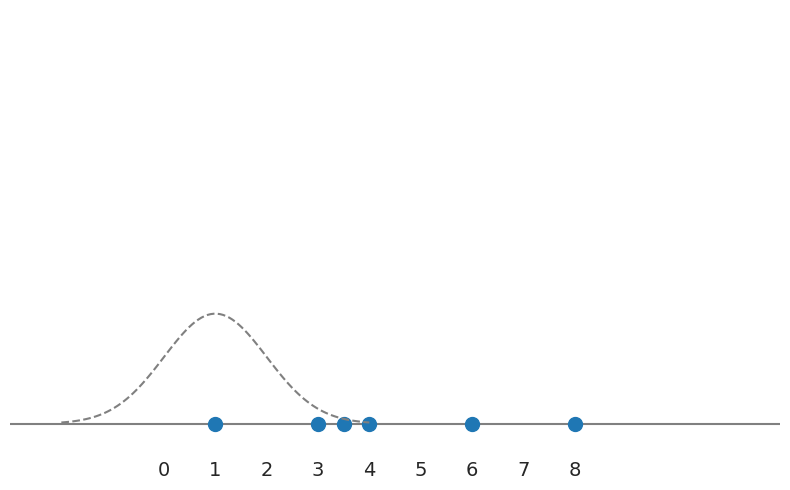

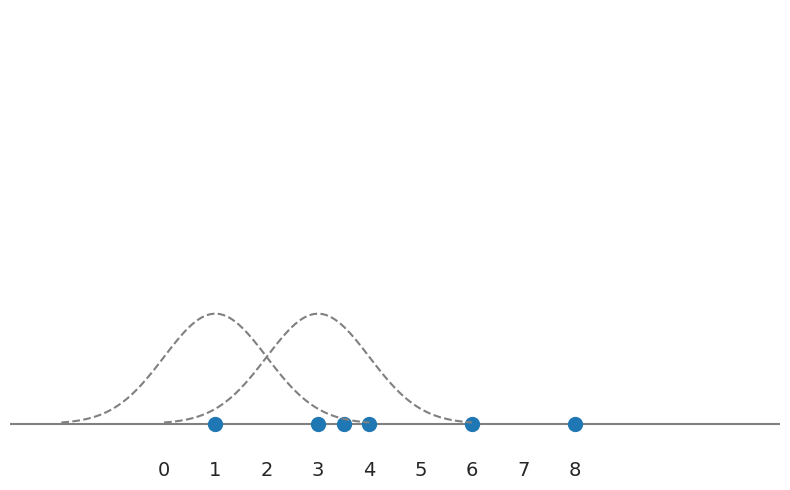

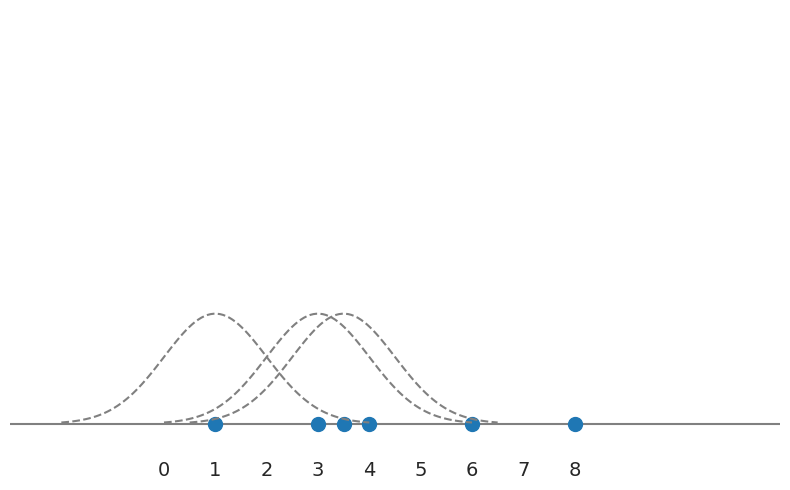

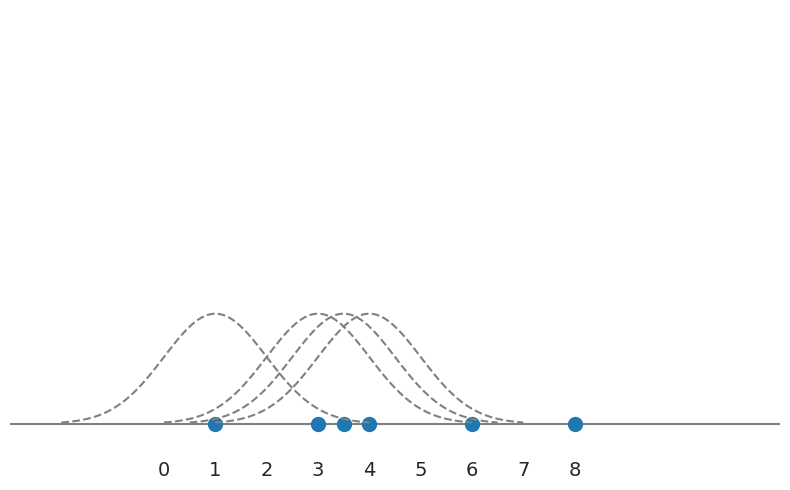

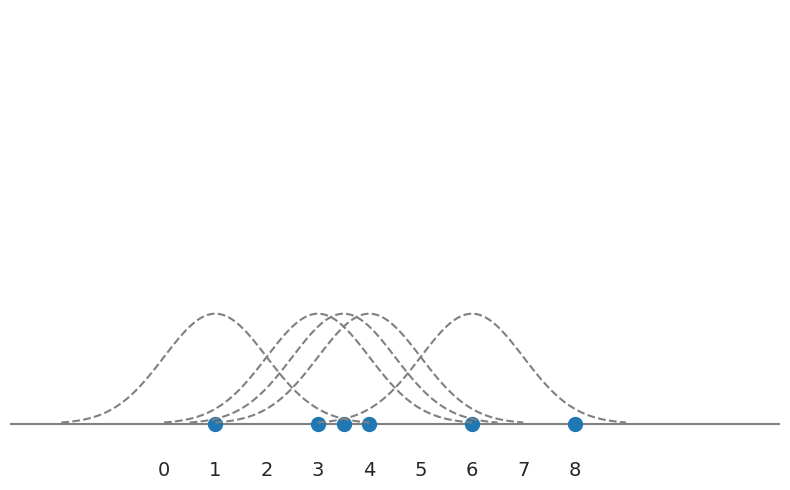

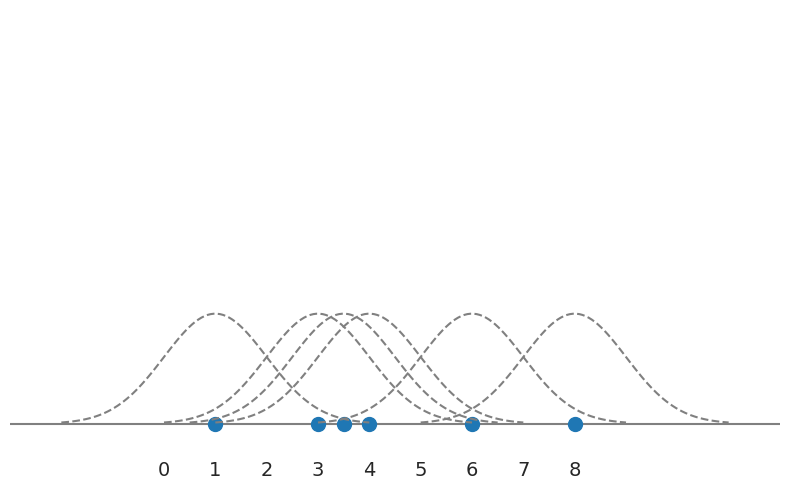

In [100]:
for i in range(len(pts)):
    plt.figure(figsize=(8, 5))
    for point in pts[0:i+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_kernel{i}.svg');

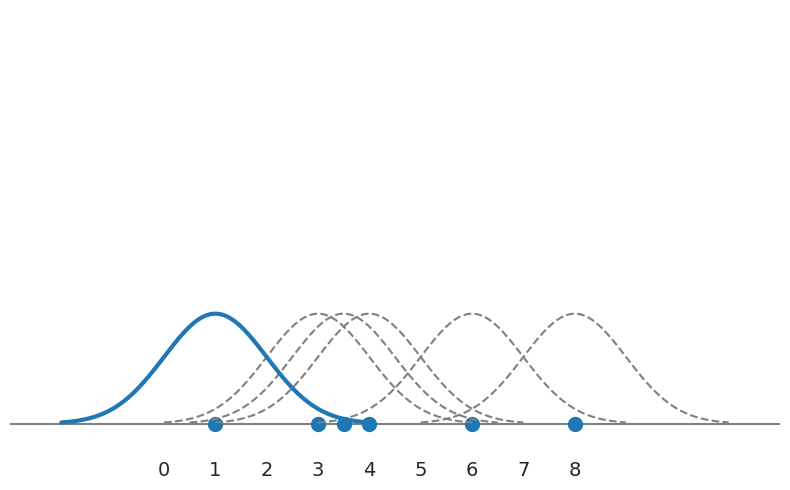

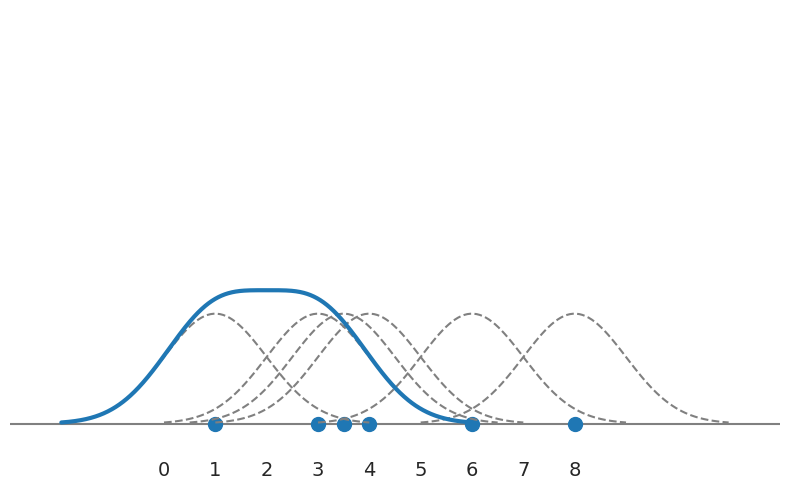

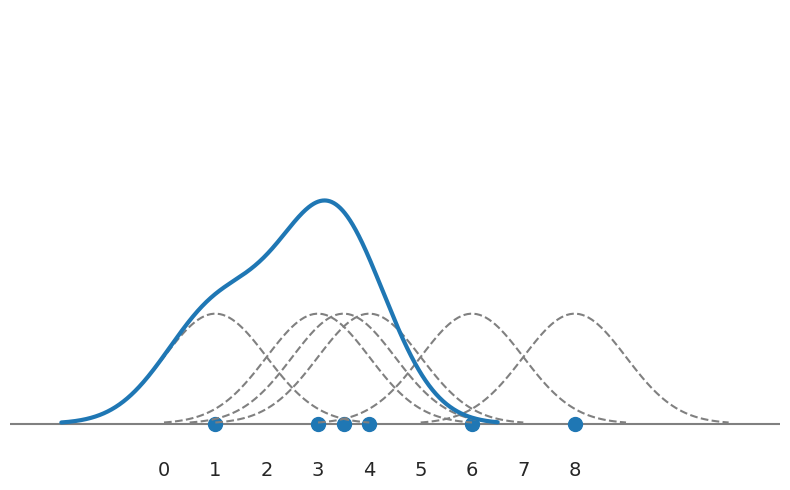

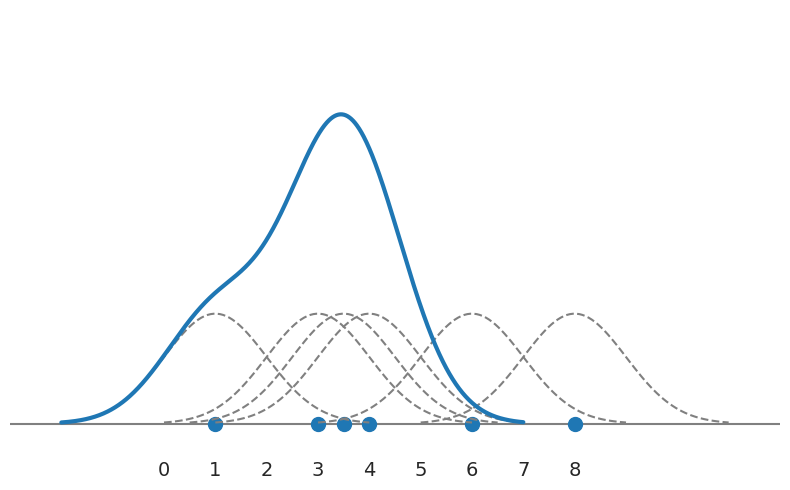

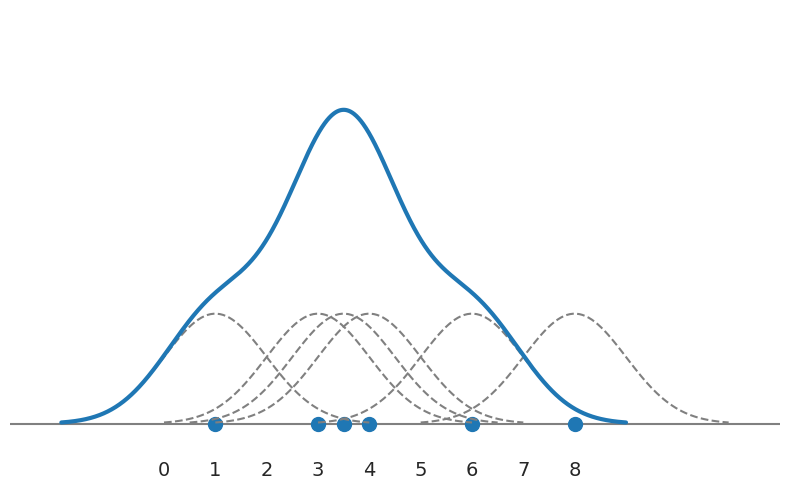

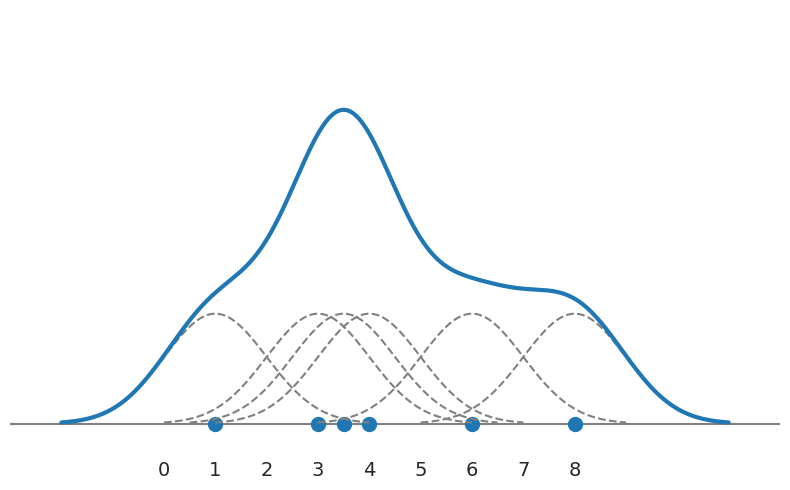

In [101]:
for i in range(1, len(pts)+1):
    plt.figure(figsize=(8, 5))
    for point in pts[0:len(pts)+1]:
        mu = point
        variance = 1
        sigma = np.sqrt(variance)
        x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
        plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)
    plt.scatter(pts, [0]*len(pts), s=100, zorder=1)
    plt.axhline(0, color='gray', zorder=0)

    total_x = np.linspace(pts[0] - 3*sigma, pts[i-1] + 3*sigma, 1000)
    total = sum([stats.norm.pdf(total_x, pts[j], sigma) for j in range(i)])
    plt.plot(total_x, total, color=blue, lw=3)
    plt.xlim(-3, 12)
    plt.ylim(-0.1, 1.5)
    plt.box(False)
    plt.xticks(range(9))
    plt.yticks([])
    plt.tight_layout();
    #plt.savefig(f'02KDE_addkernel{i}.svg');

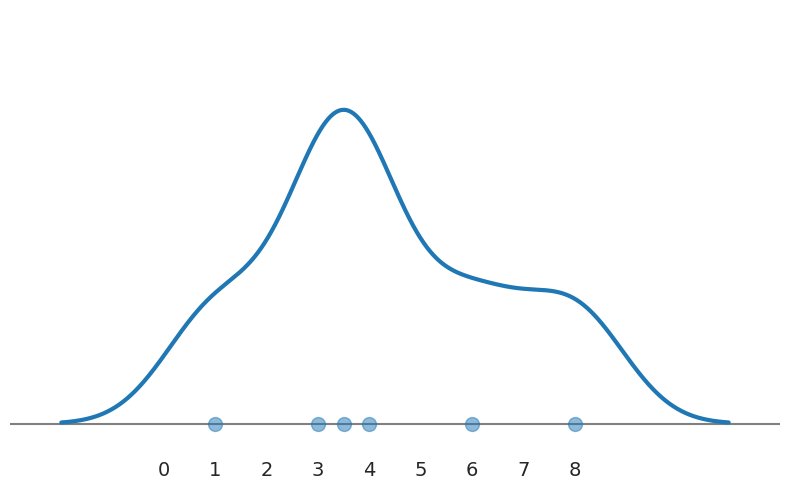

In [102]:
plt.figure(figsize=(8,5))
plt.plot(total_x, total, color=blue, lw=3)
plt.scatter(pts, [0]*len(pts), s=100, zorder=1, alpha=0.5)
plt.axhline(0, color='gray', zorder=0)
plt.xlim(-3, 12)
plt.ylim(-0.1, 1.5)
plt.box(False)
plt.xticks(range(9))
plt.yticks([])
plt.tight_layout();

### Other Kernels

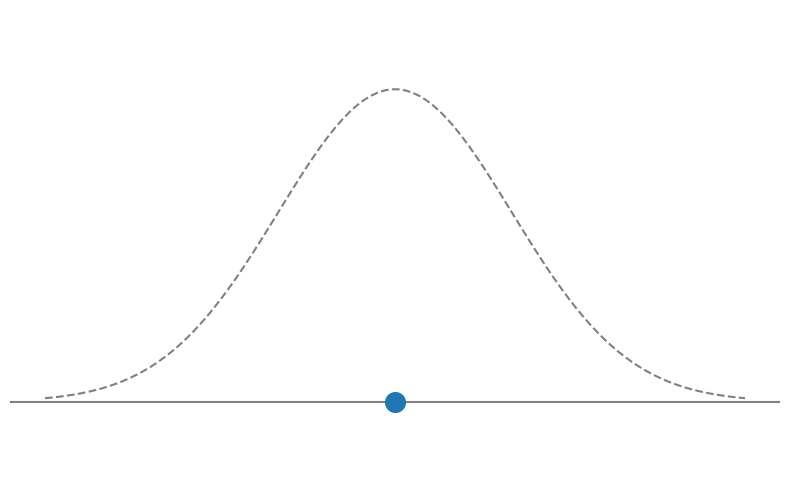

In [103]:
plt.figure(figsize=(8, 5))

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), linestyle='--', color='gray', zorder=2)

plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

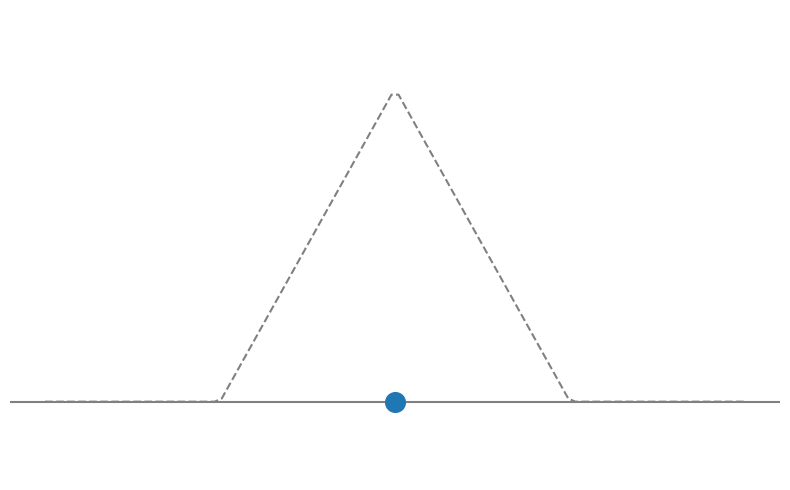

In [104]:
plt.figure(figsize=(8, 5))

def build_tri_kernel(x, center=0, sigma=1):
    m = 0.4/sigma
    if x < (center-sigma):
        return 0
    elif x < center:
        return m*x + m*(sigma-center)
    elif x < (center+sigma):
        return -m*x + m*(sigma + center)
    else:
        return 0

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_tri_kernel(val, center=mu, sigma=1.5) for val in x],
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

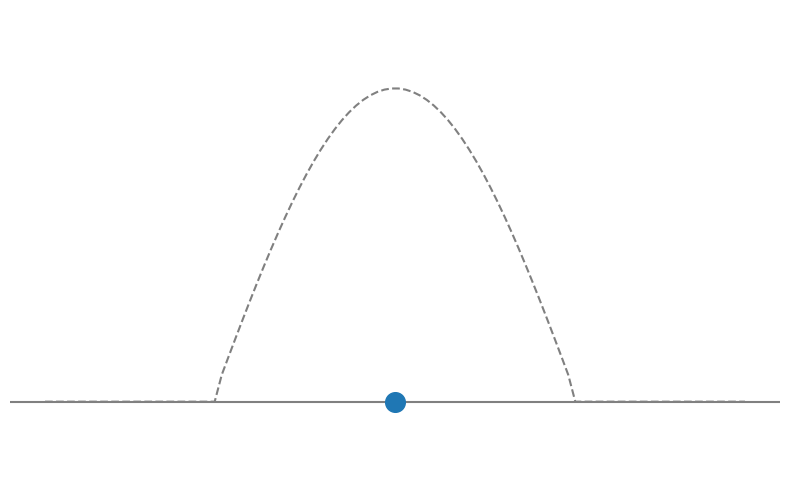

In [105]:
plt.figure(figsize=(8, 5))

def build_cos_kernel(x, center=0, sigma=1):
    if np.abs(x - center) < sigma:
        return 0.4*np.cos(x-center)
    else:
        return 0

mu = pts[3]
variance = 1
sigma = np.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, [build_cos_kernel(val, center=mu, sigma=1.5) for val in x],
         linestyle='--', color='gray', zorder=2)
plt.scatter(pts[3], [0], s=200, zorder=1)
plt.axhline(0, color='gray', zorder=0)
plt.ylim(-0.1, .5)
plt.box(False)
plt.xticks([])
plt.yticks([])
plt.tight_layout();

## Univariate (1D)

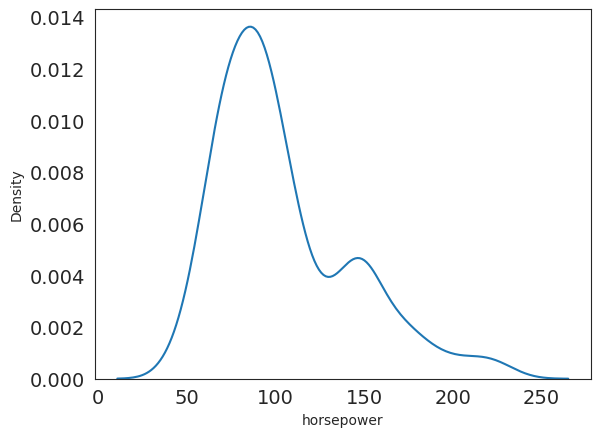

In [106]:
sns.kdeplot(cars.horsepower);

<ipython-input-107-88f5b68b9858>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cars.horsepower, shade=True);


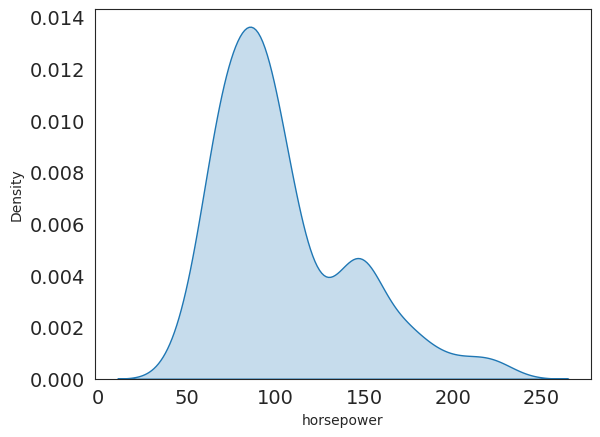

In [107]:
sns.kdeplot(cars.horsepower, shade=True);

<ipython-input-108-b5d6cbfe95f1>:1: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(cars.horsepower, bw=5);


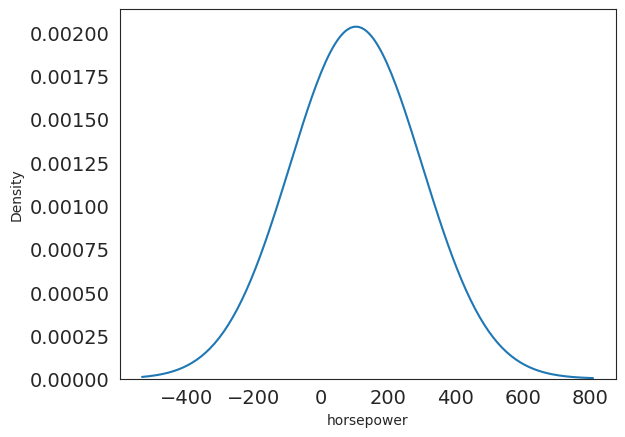

In [108]:
sns.kdeplot(cars.horsepower, bw=5);

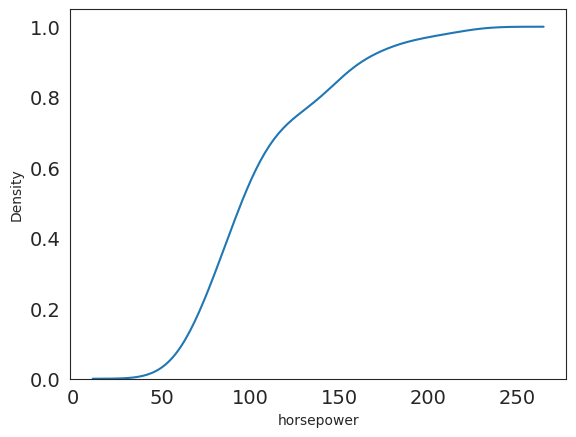

In [109]:
sns.kdeplot(cars.horsepower, cumulative=True);

### Bandwidth Widget

In [110]:
from ipywidgets import interact, interactive, HBox, VBox, interactive_output

from IPython.display import display

In [111]:
def bandwidth_widget(bw=10):
    sns.kdeplot(cars.horsepower, bw=bw, lw=3, shade=True)
    plt.xlim(-30, 300)
    plt.ylim(0, 0.03)

interactive(children=(IntSlider(value=10, description='bw', max=30, min=1), Output()), _dom_classes=('widget-i…

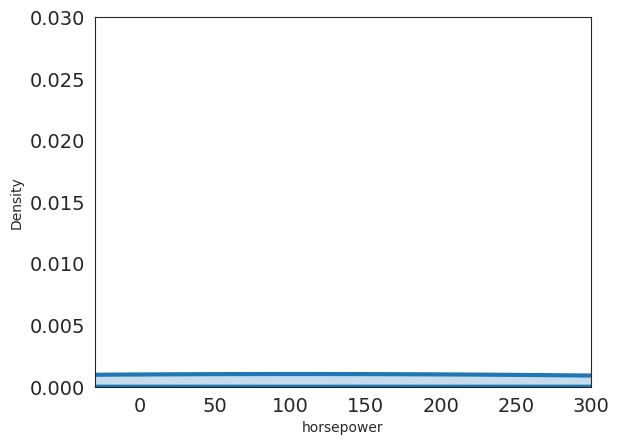

In [112]:
interactive(bandwidth_widget, bw=(1, 30, 1))

## Bivariate (2D)

### Bivariate Intro

In [113]:
sns.set_style('darkgrid')

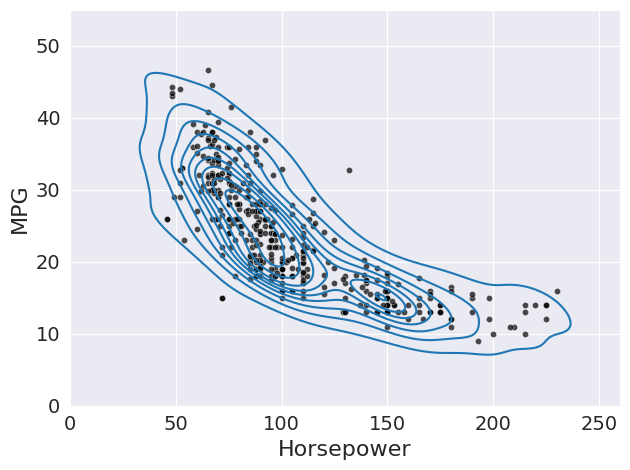

In [114]:
sns.kdeplot(data=cars, x='horsepower', y='mpg')

# Add scatter plot
sns.scatterplot(data=cars, x='horsepower', y='mpg', color='black', alpha=0.7, s=20)

# Set axis limits
plt.xlim(0, 260)
plt.ylim(0, 55)

# Set labels
plt.xlabel('Horsepower', fontsize=16)
plt.ylabel('MPG', fontsize=16)

# Adjust layout
plt.tight_layout()

plt.show()

### Bivariate Demo

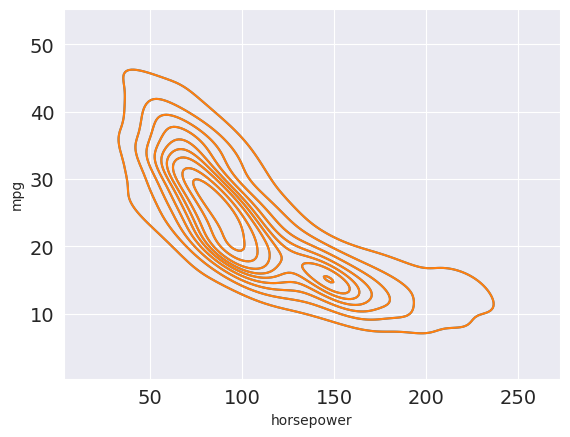

In [125]:
sns.kdeplot(data=cars, x='horsepower', y='mpg')

sns.kdeplot(x=cars.horsepower, y=cars.mpg)

plt.show()

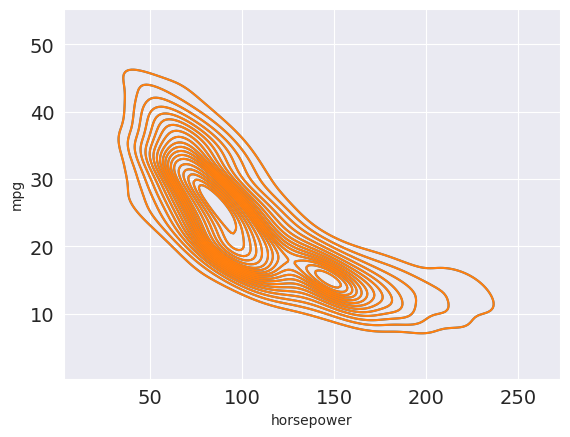

In [128]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, levels=20)
sns.kdeplot(data=cars, x='horsepower', y='mpg', levels=20)

plt.show()

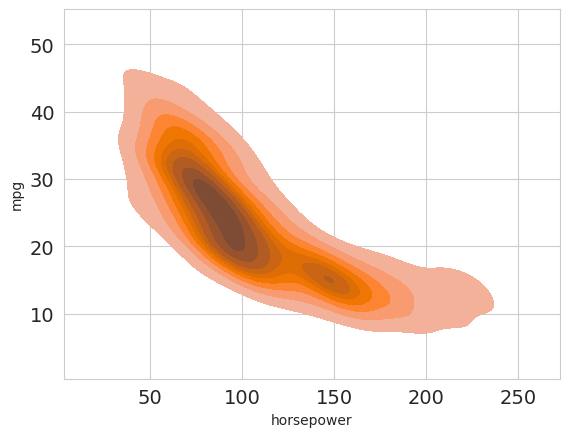

In [131]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg, fill=True)  # Changed shade to fill

# OR using data parameter
sns.kdeplot(data=cars, x='horsepower', y='mpg', fill=True)

plt.show()


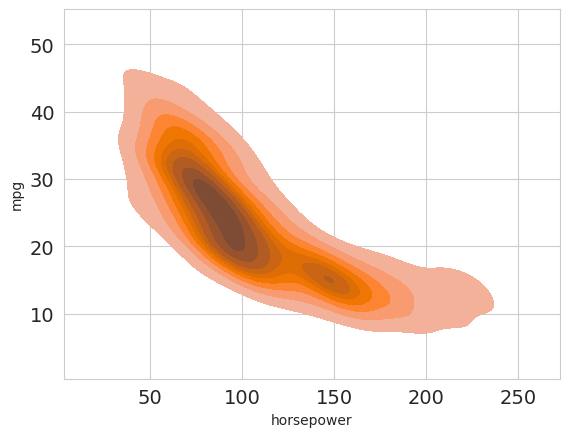

In [132]:
sns.set_style('whitegrid')

# Update kdeplot syntax for newer versions
sns.kdeplot(x=cars.horsepower, y=cars.mpg,
           fill=True,  # Changed from shade
           thresh=0.05  # Changed from shade_lowest
          )

# OR using data parameter
sns.kdeplot(data=cars, x='horsepower', y='mpg',
           fill=True,
           thresh=0.05
          )

plt.show()

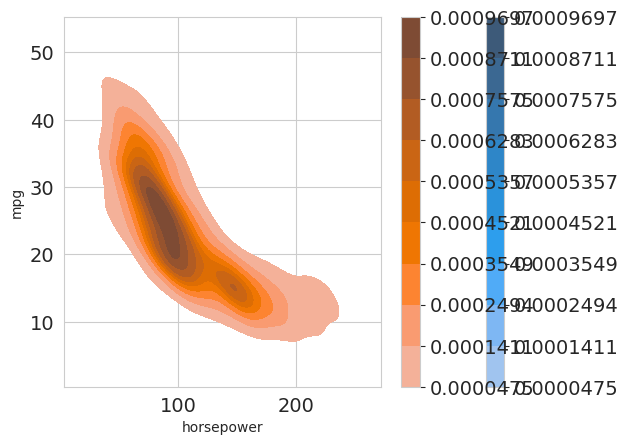

In [133]:
sns.kdeplot(x=cars.horsepower, y=cars.mpg,
           fill=True,  # Changed from shade
           thresh=0.05,  # Changed from shade_lowest
           cbar=True
          )

# OR using data parameter
sns.kdeplot(data=cars, x='horsepower', y='mpg',
           fill=True,
           thresh=0.05,
           cbar=True
          )

plt.show()

## Bivariate KDEplot by Category

<ipython-input-136-34e4334b9fc5>:8: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
<ipython-input-136-34e4334b9fc5>:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
<ipython-input-136-34e4334b9fc5>:10: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
<ipython-input-136-34e4334b9fc5>:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,


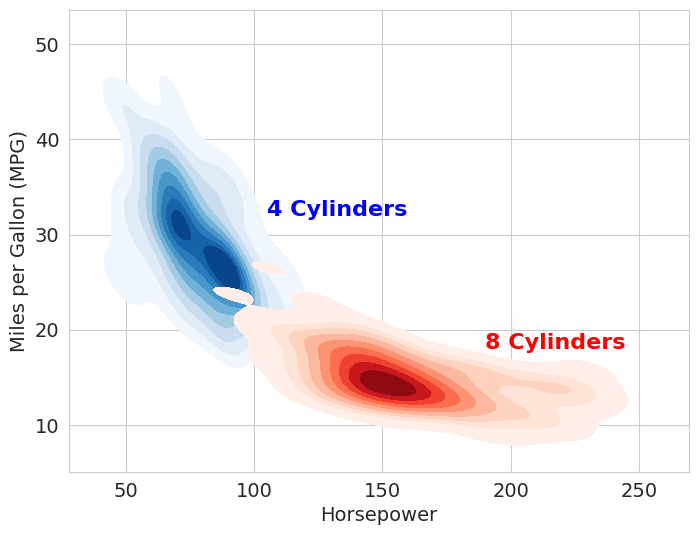

In [136]:
sns.set_style('whitegrid')

cyl_4 = cars[cars.cylinders==4]
cyl_8 = cars[cars.cylinders==8]

plt.figure(figsize=(8,6))

sns.kdeplot(x=cyl_4.horsepower, y=cyl_4.mpg,
            cmap="Blues", shade=True, shade_lowest=False)
sns.kdeplot(x=cyl_8.horsepower, y=cyl_8.mpg,
            cmap="Reds", shade=True, shade_lowest=False)

plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Miles per Gallon (MPG)', fontsize=14)

plt.annotate("4 Cylinders", (105, 32), color='blue', fontsize=16, fontweight='bold')
plt.annotate("8 Cylinders", (190, 18), color='red', fontsize=16, fontweight='bold')

plt.show()

## Other Figures that use KDE

<ipython-input-135-8cbe5e767919>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})


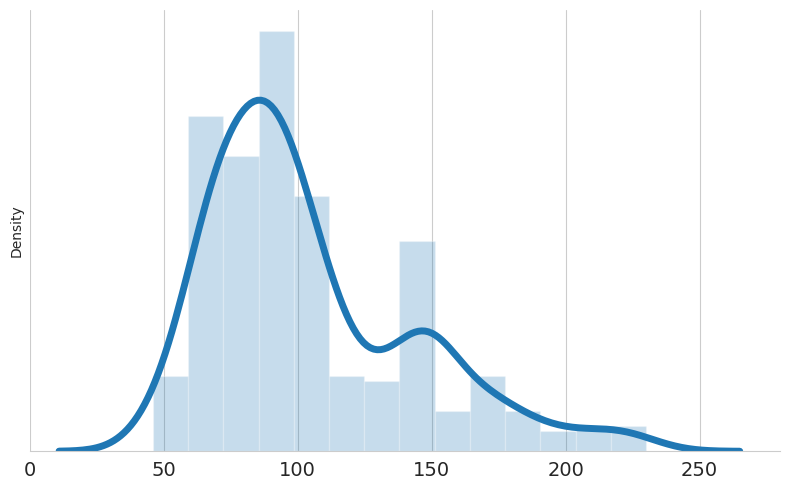

In [135]:
plt.figure(figsize=(8,5))
sns.distplot(hp, kde_kws={"lw": 5}, hist_kws={'alpha': 0.25})

sns.despine(left=True)
plt.xlim(0, 280)
plt.xlabel('')
plt.yticks([])
plt.tight_layout();

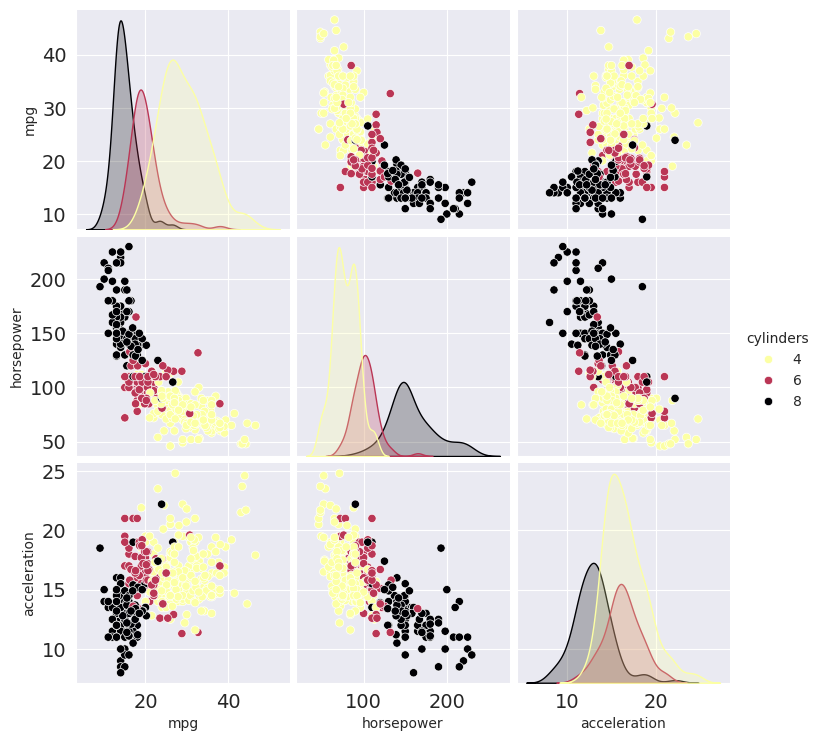

In [121]:
sns.pairplot(cars[cars.cylinders.isin([4,6,8])],
             hue='cylinders',
             vars=['mpg', 'horsepower', 'acceleration'],
             palette='inferno_r'
            );